# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel("secondhandcar.xlsx")
df = df.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1)
df.head()

Brand              Variant     Mileage    Fuel  Owner  \
0       Bmw   GT 320d Sport Line   37,000 KM  DIESEL    1st   
1   Renault                  NaN  98663.0 KM  DIESEL     --   
2     Honda  2013-2016 S i-Vtech  31612.0 KM  PETROL    1st   
3  Mahindra     2011-2015 W6 2WD    73671 KM  DIESEL  First   
4     Honda            i-DTEC VX    44000 KM  DIESEL  First   

                Location       Price     Model  
0         Colaba, Mumbai  ₹ 9,90,000  3 Series  
1    Kalyan East, Mumbai  ₹ 4,88,000    Duster  
2   New Gurgaon, Gurgaon  ₹ 4,69,800     Amaze  
3     Uttam Nagar, Delhi  ₹ 6,50,000    Xuv500  
4  Lajpat Nagar 1, Delhi  ₹ 7,50,000      Wr-V

In [3]:
df.shape

(5819, 8)

we have 5819 rows and 8 columns

In [4]:
df.columns

Index(['Brand', 'Variant', 'Mileage', 'Fuel', 'Owner', 'Location', 'Price',
       'Model'],
      dtype='object')

In [5]:
df.dtypes

Brand       object
Variant     object
Mileage     object
Fuel        object
Owner       object
Location    object
Price       object
Model       object
dtype: object

All the columns are object type and need to change Mileage and Price columns data type

In [6]:
df["Price"] = df["Price"].str.replace(r'[^\d.]', '')        
df["Price"] = df["Price"].fillna(0).astype(int)

replace function is used for removing the comma For changing the data type  and fill nan value with zero. After that changed data type as integer.

In [7]:
df["Mileage"] = df["Mileage"].str.strip("KM")
df["Mileage"] = df["Mileage"].str.replace(r'[^\d.]', '')
df["Mileage"] = df["Mileage"].astype(float)

clean the Mileage column also and change the data type as float

In [8]:
df.dtypes

Brand        object
Variant      object
Mileage     float64
Fuel         object
Owner        object
Location     object
Price         int32
Model        object
dtype: object

In [9]:
df.isnull().sum()

Brand       273
Variant     662
Mileage     273
Fuel        295
Owner       358
Location    279
Price         0
Model       273
dtype: int64

The next step is handle the missing value

function for handling missing value in categorical column

In [10]:
def imput_nan_category(DataFrame,ColName):
    most_frequent_category=DataFrame[ColName].mode()[0]  
    DataFrame[ColName + "_Imputed"] = DataFrame[ColName] 
    DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [11]:
for columns in ['Brand','Model','Variant','Fuel','Owner','Location']:
    imput_nan_category(df,columns)

In [12]:
df[["Brand","Model","Variant","Fuel","Owner","Location",'Brand_Imputed','Model_Imputed','Variant_Imputed','Fuel_Imputed','Owner_Imputed','Location_Imputed']]

Brand      Model                     Variant    Fuel  Owner  \
0               Bmw   3 Series          GT 320d Sport Line  DIESEL    1st   
1           Renault     Duster                         NaN  DIESEL     --   
2             Honda      Amaze         2013-2016 S i-Vtech  PETROL    1st   
3          Mahindra     Xuv500            2011-2015 W6 2WD  DIESEL  First   
4             Honda       Wr-V                   i-DTEC VX  DIESEL  First   
...             ...        ...                         ...     ...    ...   
5814  Maruti Suzuki    Wagon R                         LXI     LPG    1st   
5815          Skoda      Rapid         1.5 TDI AT Ambition  Diesel    1st   
5816        Renault     Duster  Adventure Edition 85PS RXE  Diesel    1st   
5817  Maruti Suzuki      Swift                         VDI  Diesel    2nd   
5818        Hyundai  Grand i10       Sportz 1.2 Kappa VTVT  Petrol    1st   

                   Location  Brand_Imputed Model_Imputed  \
0            Colaba, Mumbai            Bmw      3 Series   
1       Kalyan East, Mumbai        Renault        Duster   
2      New Gurgaon, Gurgaon          Honda         Amaze   
3        Uttam Nagar, Delhi       Mahindra        Xuv500   
4     Lajpat Nagar 1, Delhi          Honda          Wr-V   
...                     ...            ...           ...   
5814                  Erode  Maruti Suzuki       Wagon R   
5815              Bengaluru          Skoda         Rapid   
5816                 Nashik        Renault        Duster   
5817                  Salem  Maruti Suzuki         Swift   
5818              Bengaluru        Hyundai     Grand i10   

                 Variant_Imputed Fuel_Imputed Owner_Imputed  \
0             GT 320d Sport Line       DIESEL           1st   
1                         Others       DIESEL            --   
2            2013-2016 S i-Vtech       PETROL           1st   
3               2011-2015 W6 2WD       DIESEL         First   
4                      i-DTEC VX       DIESEL         First   
...                          ...          ...           ...   
5814                         LXI          LPG           1st   
5815         1.5 TDI AT Ambition       Diesel           1st   
5816  Adventure Edition 85PS RXE       Diesel           1st   
5817                         VDI       Diesel           2nd   
5818       Sportz 1.2 Kappa VTVT       Petrol           1st   

           Location_Imputed  
0            Colaba, Mumbai  
1       Kalyan East, Mumbai  
2      New Gurgaon, Gurgaon  
3        Uttam Nagar, Delhi  
4     Lajpat Nagar 1, Delhi  
...                     ...  
5814                  Erode  
5815              Bengaluru  
5816                 Nashik  
5817                  Salem  
5818              Bengaluru  

[5819 rows x 12 columns]

In [13]:
df = df.drop(['Brand','Model','Variant','Fuel','Owner','Location'],axis=1)

In [14]:
df["Mileage"] = df["Mileage"].fillna(df.groupby("Model_Imputed")["Price"].transform("median"))

In [15]:
df["Price"]=df["Price"].replace(0,np.NaN)

Replace zero as nan and fill with groupby function

In [16]:
df["Price"].isnull().sum()

253

In [17]:
df["Price"] = df["Price"].fillna(df.groupby("Mileage")["Price"].transform("mean"))


In [18]:
df["Price"] = df["Price"].astype(int)

In [19]:
df.isnull().sum()

Mileage             0
Price               0
Brand_Imputed       0
Model_Imputed       0
Variant_Imputed     0
Fuel_Imputed        0
Owner_Imputed       0
Location_Imputed    0
dtype: int64

clear all the missing value

0       low
1       low
2       low
3       low
4       low
       ... 
5814    low
5815    low
5816    low
5817    low
5818    low
Name: Price-binned, Length: 5819, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']


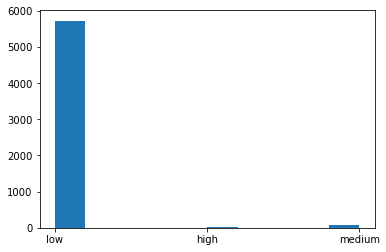

In [20]:
# binning grouping values
bins = np.linspace(min(df['Price']),max(df["Price"]),4)
group_names = ['low','medium','high']
df["Price-binned"] = pd.cut(df["Price"],bins,labels = group_names,include_lowest=True)

print(df["Price-binned"])
plt.hist(df["Price-binned"])
plt.show()

create a new column which is based on price and categerise low,medium and high price

<AxesSubplot:xlabel='Owner_Imputed', ylabel='Price'>

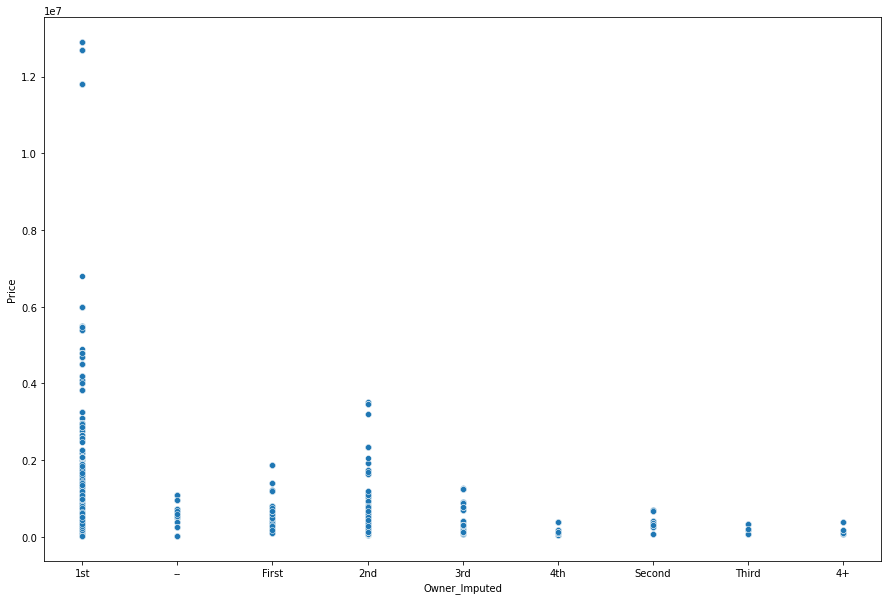

In [21]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Owner_Imputed",y = "Price",data=df)

Most of the first owner car price are in all the categeries except medium price and others are in below medium level price

In [22]:
df["Owner_Imputed"].value_counts()

1st       3783
2nd       1278
First      280
3rd        217
--         106
Second      57
4th         55
Third       24
4+          19
Name: Owner_Imputed, dtype: int64

Try replace as similar categery name 

In [23]:
df["Owner_Imputed"].replace("1st","First",inplace=True)
df["Owner_Imputed"].replace("2nd","Second",inplace=True)
df["Owner_Imputed"].replace("3rd","Third",inplace=True)
df["Owner_Imputed"].replace("4th","Fourth",inplace=True)
df["Owner_Imputed"].replace("4+","Fourth & Above Owner",inplace=True)
df["Owner_Imputed"].replace("--","Other",inplace=True)

In [24]:
df["Owner_Imputed"].value_counts()

First                   4063
Second                  1335
Third                    241
Other                    106
Fourth                    55
Fourth & Above Owner      19
Name: Owner_Imputed, dtype: int64

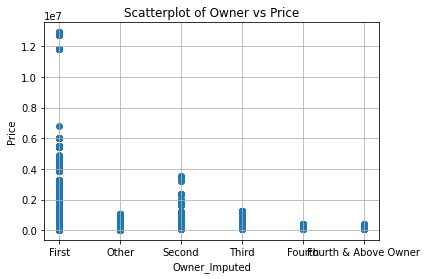

In [25]:
plt.scatter(df['Owner_Imputed'], df['Price'])
plt.title('Scatterplot of Owner vs Price')
plt.xlabel('Owner_Imputed')
plt.ylabel('Price')
plt.grid()
plt.show()

In [26]:
df["Brand_Imputed"].value_counts()

Maruti           1413
Hyundai           840
Maruti Suzuki     571
Honda             438
Toyota            387
Mahindra          387
Ford              304
Tata              292
Renault           187
Chevrolet         152
Volkswagen        132
Mercedes-Benz     102
Bmw                97
Skoda              84
Audi               73
Nissan             61
Volvo              46
Other              37
Datsun             34
Force              28
BMW                27
Fiat               26
Mitsubishi         25
Bajaj              21
Land Rover         21
Jeep               17
MG                 10
Kia                 7
Name: Brand_Imputed, dtype: int64

In [27]:
df["Brand_Imputed"] = df["Brand_Imputed"].str.replace("Bmw","BMW")
df["Brand_Imputed"] = df["Brand_Imputed"].replace("Maruti","Maruti Suzuki")

In [28]:
df["Brand_Imputed"].value_counts()

Maruti Suzuki    1984
Hyundai           840
Honda             438
Mahindra          387
Toyota            387
Ford              304
Tata              292
Renault           187
Chevrolet         152
Volkswagen        132
BMW               124
Mercedes-Benz     102
Skoda              84
Audi               73
Nissan             61
Volvo              46
Other              37
Datsun             34
Force              28
Fiat               26
Mitsubishi         25
Bajaj              21
Land Rover         21
Jeep               17
MG                 10
Kia                 7
Name: Brand_Imputed, dtype: int64

<AxesSubplot:xlabel='Brand_Imputed', ylabel='Price'>

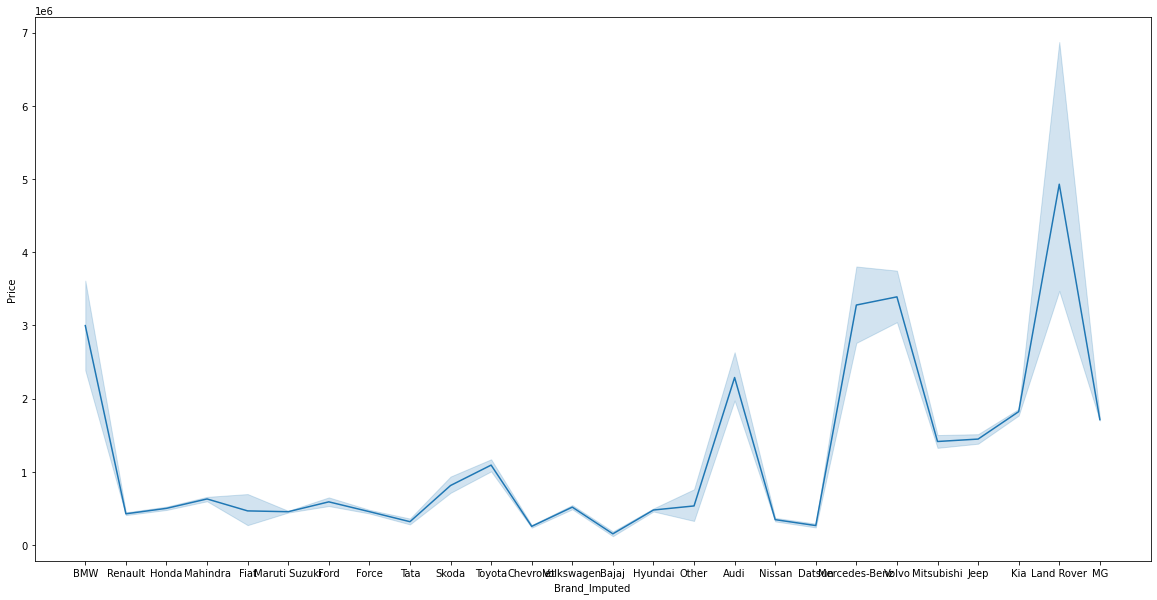

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Brand_Imputed",y="Price",data=df)

I t shows the relationship between brand and price. top class price brand is BMW,Audi,Nissan,Mercedes benz,Mitsubishi,Land rover etc.

In [30]:

df["Variant_Imputed"].value_counts()

Others                        890
VXI                           219
VDI                           122
LXI                           102
AC                             77
                             ... 
Adventure Edition 85PS RXE      1
2001-2010 SLE BSIII             1
2010-2012 1.2 Asta              1
1.2 Kappa Magna AT              1
LTZ AT                          1
Name: Variant_Imputed, Length: 498, dtype: int64

In the variant columns can see the unwanted simbols and numbers . so for understanding of mechin raplace it

In [31]:
df["Variant_Imputed"] = df["Variant_Imputed"].str.replace(r'[^\w\d\s]',' ')
df["Variant_Imputed"] = df["Variant_Imputed"].str.replace(r'\s+',' ')
df["Variant_Imputed"] = df["Variant_Imputed"].str.replace(r'^\s+|\s+?$',' ')
df["Variant_Imputed"] = df["Variant_Imputed"].str.upper()
df["Variant_Imputed"] = df["Variant_Imputed"].str.replace(r'\d+(\.\d+)?','number')
df["Variant_Imputed"].value_counts()

OTHERS                                        890
VXI                                           232
VDI                                           167
LXI                                           132
AC                                             77
                                             ... 
DICOR number number LX numberXnumber BS IV      1
ADVENTURE EDITION numberPS RXE                  1
number number XV CVT                            1
number TDI TECHNOLOGY PACK SUNROOF              1
number number Enumber BS III                    1
Name: Variant_Imputed, Length: 445, dtype: int64

In [32]:
df["Fuel_Imputed"].value_counts()

DIESEL           2035
PETROL           1425
Diesel           1112
Petrol            940
CNG & HYBRIDS     157
CNG & Hybrids      56
--                 46
LPG                27
CNG                21
Name: Fuel_Imputed, dtype: int64

In [33]:
df["Fuel_Imputed"]=df["Fuel_Imputed"].replace("Diesel","DIESEL")
df["Fuel_Imputed"]=df["Fuel_Imputed"].replace("Petrol","PETROL")
df["Fuel_Imputed"]=df["Fuel_Imputed"].replace("--","OTHER")
df["Fuel_Imputed"]=df["Fuel_Imputed"].replace("CNG & Hybrids","CNG & HYBRIDS")
df["Fuel_Imputed"]=df["Fuel_Imputed"].replace("CNG","CNG & HYBRIDS")
df["Fuel_Imputed"].value_counts()

DIESEL           3147
PETROL           2365
CNG & HYBRIDS     234
OTHER              46
LPG                27
Name: Fuel_Imputed, dtype: int64

<AxesSubplot:xlabel='Fuel_Imputed', ylabel='Price'>

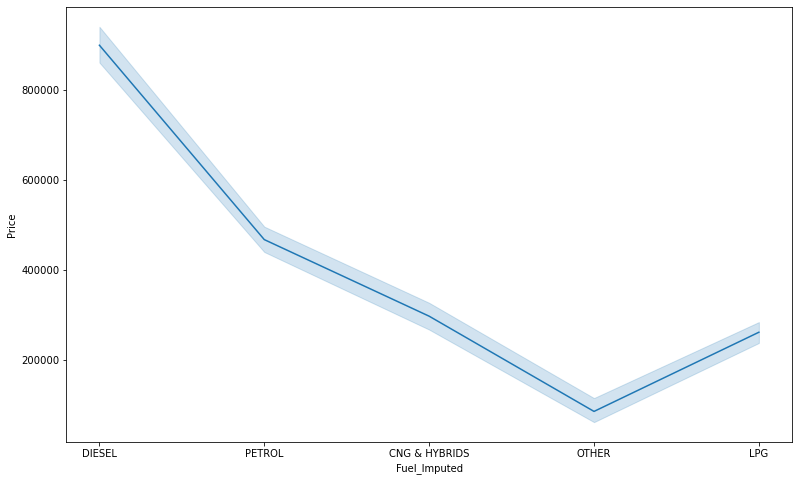

In [34]:
plt.figure(figsize=(13,8))
sns.lineplot(x="Fuel_Imputed",y="Price",data=df)

Highest price car's fual is diesel. so can understand diesel car is the highest price. Other fuel car is the lowest rate.

In [35]:
df["Location_Imputed"].value_counts()

Delhi           594
Chennai         207
Mumbai          163
Ahmedabad       108
Chandigarh       84
               ... 
Cheruthazham      1
Imphal            1
Kunnamkulam       1
Erode             1
Shivamogga        1
Name: Location_Imputed, Length: 426, dtype: int64

In [36]:
df["Model_Imputed"].value_counts()

Suzuki            1413
City               172
Innova             165
Ecosport           128
Swift Dzire        103
                  ... 
Nano GenX            2
Koleos               2
CLS-Class            2
Q3                   1
Grand i10 Nios       1
Name: Model_Imputed, Length: 177, dtype: int64

<AxesSubplot:xlabel='Brand_Imputed', ylabel='Fuel_Imputed'>

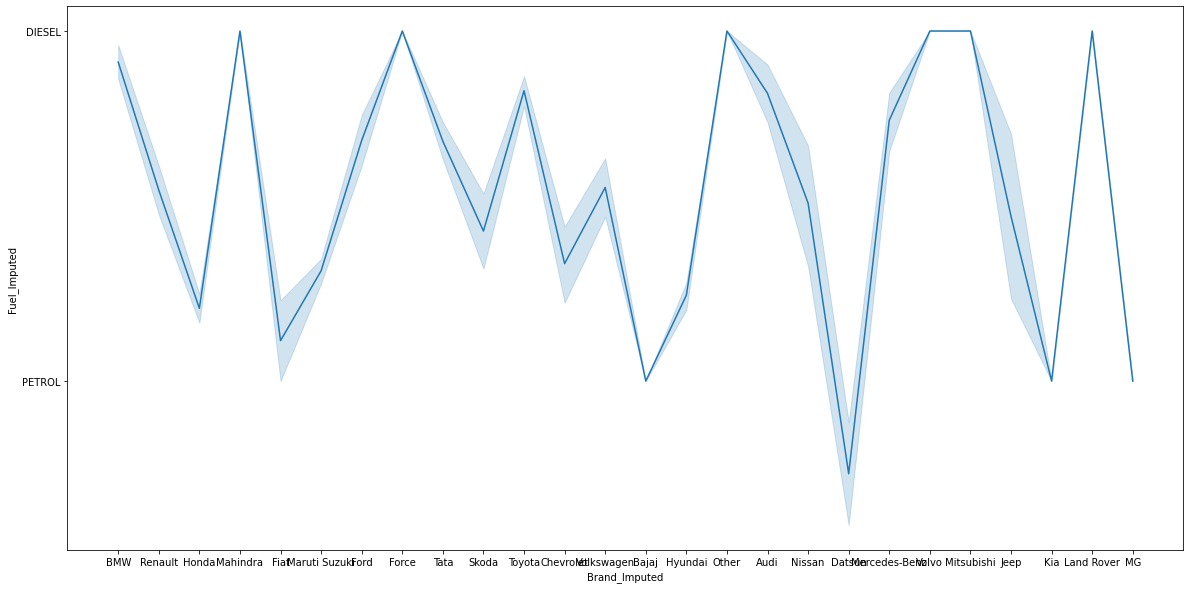

In [37]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Brand_Imputed",y="Fuel_Imputed",data=df)

In the second hand market most of the cars are in diesel type comparitivly other 

In [38]:
df.Price.unique()

array([  990000,   488000,   469800,   650000,   750000,   325000,
         245000,    85000,   380000,    95000,   695000,   300000,
         140000,   743654,   450000,  1050000,   265000,   583800,
         210000,   790000,  1195000,   255000,  1250000,   550000,
         950000,   425000,    30000,   180000,    50000,   130000,
         575000,   799999,   165000,   441000,   299000,   637000,
         600000,   405000,   100000,   385000,   390000,   225000,
         220000,   749000,   500000,   785000,   350000,   865000,
        1385000,   730000,   799000,   270000,   280000,   445000,
         459000,   150000,   625000,   310000,   375000,   285000,
        2950000,   475000,   520000, 11800000,   700000,    80000,
          60000,   250000,  1600000,   200000,   880000,   275000,
        2900000,  1084000,   800000,   530000,   251000,   215000,
         850000,   775000,   199000,   551000,   630000,   115000,
         260000,  1300000,   370000,  4800000,   205000,  1000

list of unique price

In [39]:
df["Price-binned"].value_counts()

low       5718
medium      81
high        20
Name: Price-binned, dtype: int64

In [40]:
df.columns

Index(['Mileage', 'Price', 'Brand_Imputed', 'Model_Imputed', 'Variant_Imputed',
       'Fuel_Imputed', 'Owner_Imputed', 'Location_Imputed', 'Price-binned'],
      dtype='object')

# Encoding

In [369]:
label=LabelEncoder()
cat_col=['Brand_Imputed', 'Model_Imputed', 'Variant_Imputed',
       'Fuel_Imputed', 'Owner_Imputed', 'Location_Imputed', 'Price-binned']
for col in cat_col:
    df[col] = label.fit_transform(df[col])

In [371]:
# after changing the category columns
df.head()

Mileage   Price  Brand_Imputed  Model_Imputed  Variant_Imputed  \
0  37000.0  990000              1              0               82   
1  98663.0  488000             20             42              120   
2  31612.0  469800              8             14              331   
3  73671.0  650000             14            172              385   
4  44000.0  750000              8            163               89   

   Fuel_Imputed  Owner_Imputed  Location_Imputed  Price-binned  
0             1              0                71             1  
1             1              3               156             1  
2             4              0               267             1  
3             1              0               407             1  
4             1              0               199             1

In [372]:
# split the columns as x and y for model building
x = df.drop(columns=['Price'])
y = df["Price"]

In [374]:
# make all the columns as single formate
scal = StandardScaler()
x = scal.fit_transform(x)

In [378]:
# for getting better random state for better accuracy
max_r_score=0
for r_state in range(40,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  40  is:  0.039073891316705134
r2_score corresponding to random state:  41  is:  0.07877704407462438
r2_score corresponding to random state:  42  is:  0.12848334038325715
r2_score corresponding to random state:  43  is:  0.06079212220774066
r2_score corresponding to random state:  44  is:  0.15357844601895254
r2_score corresponding to random state:  45  is:  0.09523731395506552
r2_score corresponding to random state:  46  is:  0.1343896903393076
r2_score corresponding to random state:  47  is:  0.07480865347207244
r2_score corresponding to random state:  48  is:  0.089991317434303
r2_score corresponding to random state:  49  is:  0.07590091284574274
r2_score corresponding to random state:  50  is:  0.0720251543482976
r2_score corresponding to random state:  51  is:  0.014311487482974061
r2_score corresponding to random state:  52  is:  0.14254970310287496
r2_score corresponding to random state:  53  is:  0.16559702305020096
r2_score corresponding

better random state is 83

In [379]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =83,test_size=0.20)

In [380]:
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    r2 = r2_score(y_test,pred)
    print("r2 score is:",r2)
    print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))

In [381]:
eval(KNeighborsRegressor())

r2 score is: 0.9312641905693481
RMSE: 195008.85875795234


In [382]:
kn = KNeighborsRegressor()

params = {'n_neighbors':np.arange(0,8),
          'weights':['uniform','distance'],
          'algorithm':['auto','ball_tree','brute']}
cv = KFold ( n_splits = 5,shuffle = False ,random_state = None)

gcv = GridSearchCV(kn,params,cv=cv)


In [383]:
gcv .fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute'],
                         'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7]),
                         'weights': ['uniform', 'distance']})

In [384]:
gcv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}

In [385]:
kn_new=KNeighborsRegressor(algorithm ='ball_tree',n_neighbors = 5, weights = 'distance')
kn_new.fit(x_train,y_train)
pred=kn_new.predict(x_test)
print(r2_score(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.9921149898286983
66048.64980625373


before r2 score is 93 and now it increase to 99. KNeighbors perform well. lets check other model

In [386]:
eval(DecisionTreeRegressor())

r2 score is: 0.9892667293119471
RMSE: 77059.97364979556


In [387]:
tre=DecisionTreeRegressor()

params= {'criterion':['mse','mae','poisson'],
        'splitter':['best','random'],
        'max_depth':np.arange(1,10)}

cv=KFold(n_splits=5,shuffle=False, random_state=None)
gcv = GridSearchCV (tre , params , cv=cv)

In [388]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [389]:
gcv.best_params_

{'criterion': 'mse', 'max_depth': 9, 'splitter': 'best'}

In [390]:
tre_new=DecisionTreeRegressor( criterion = 'mse', max_depth= 9 ,splitter='best')
tre_new.fit(x_train,y_train)
pred=tre_new.predict(x_test)
print(r2_score(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.8080055704898911
325917.08642530907


In the case of DecisionTree before it is 98 and now it is decrease to 80. poor accuracy

In [391]:
eval(RandomForestRegressor())

r2 score is: 0.9928135799594245
RMSE: 63054.939591874994


In [392]:
forest=RandomForestRegressor()

params= {'criterion':["squared_error", "mse", "absolute_error", "poisson"],
        'max_features':["auto", "sqrt","log2"],
        'n_estimators':np.arange(1,10)}

cv=KFold(n_splits=5,shuffle=False, random_state=None)
gcv = GridSearchCV (forest , params , cv=cv)

In [393]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [394]:
gcv.best_params_

{'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 9}

In [395]:
forst=RandomForestRegressor( criterion = 'mse', max_features='log2',n_estimators=9).fit(x_train,y_train)
forst.fit(x_train,y_train)
pred=forst.predict(x_test)
print(r2_score(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.9905798886414369
72192.29253377857


Before and now also get 99 r2 score 

conclusion:
    
    RandomForestRegressor is the best model for predicting the second hand car price. 